hello
(224, 224, 3)


<ipython-input-1-c60c9047593c>:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


Text(0.5, 1.0, 'F_Banana')

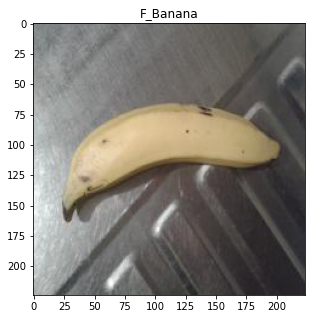

In [1]:
# Importing necessary libraries
import keras
from skimage import io
import os
import cv2
import glob
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
%matplotlib inline


# Importing and Loading the data into data frame
#class 1 - Rose, class 0- Daisy
DATASET_PATH = './FRUIT-16K/'
fruit_cls = ['F_Banana', 'S_Banana','F_Lemon','S_Lemon','F_Lulo','S_Lulo','F_Mango','S_Mango','F_Orange','S_Orange','F_Strawberry','S_Strawberry','F_Tamarillo','S_Tamarillo','F_Tomato','S_Tomato']
labels = ["F", "S"]
img_size = 224
print("hello")

# glob through the directory (returns a list of all file paths)
fruit_path = os.path.join(DATASET_PATH, fruit_cls[1], '*')
fruit_path = glob.glob(fruit_path)# access some element (a file) from the list
image = io.imread(fruit_path[251])
print(image.shape)

def get_data(data_dir):
    data = [] 
    for label in fruit_cls: 
        path = os.path.join(data_dir, label)
        class_num = fruit_cls.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data('./FRUIT-16K/train')
val = get_data('./FRUIT-16K/test')

plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(fruit_cls[train[0][1]])



In [2]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)


# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


'''
x_train = np.array(x_train)
x_val = np.array(x_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

# 1)Sequential model
datagen = ImageDataGenerator(rescale = 1./255, rotation_range=30,
                                          zoom_range=0.15, width_shift_range=0.2,
                                          height_shift_range=0.2, shear_range=0.15,
                                          horizontal_flip=True, fill_mode="nearest")


datagen.fit(x_train)
'''

'\nx_train = np.array(x_train)\nx_val = np.array(x_val)\ny_train = np.array(y_train)\ny_val = np.array(y_val)\n\n# 1)Sequential model\ndatagen = ImageDataGenerator(rescale = 1./255, rotation_range=30,\n                                          zoom_range=0.15, width_shift_range=0.2,\n                                          height_shift_range=0.2, shear_range=0.15,\n                                          horizontal_flip=True, fill_mode="nearest")\n\n\ndatagen.fit(x_train)\n'

In [3]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(len(fruit_cls), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [4]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100
400/400 [==============================] - 292s 729ms/step - loss: 2.6145 - accuracy: 0.2620 - val_loss: 2.4946 - val_accuracy: 0.3862
Epoch 2/100
400/400 [==============================] - 276s 691ms/step - loss: 2.4690 - accuracy: 0.4125 - val_loss: 2.4438 - val_accuracy: 0.4284
Epoch 3/100
400/400 [==============================] - 274s 684ms/step - loss: 2.4200 - accuracy: 0.4612 - val_loss: 2.3882 - val_accuracy: 0.4906
Epoch 4/100
400/400 [==============================] - 271s 677ms/step - loss: 2.3788 - accuracy: 0.5034 - val_loss: 2.3652 - val_accuracy: 0.5141
Epoch 5/100
400/400 [==============================] - 267s 668ms/step - loss: 2.3396 - accuracy: 0.5437 - val_loss: 2.3284 - val_accuracy: 0.5537
Epoch 6/100
400/400 [==============================] - 270s 674ms/step - loss: 2.3167 - accuracy: 0.5640 - val_loss: 2.3232 - val_accuracy: 0.5597
Epoch 7/100
400/400 [==============================] - 270s 675ms/step - loss: 2.3019 - accuracy: 0.5788 - val_loss: 2

400/400 [==============================] - 271s 677ms/step - loss: 2.0240 - accuracy: 0.8512 - val_loss: 2.0499 - val_accuracy: 0.8278
Epoch 57/100
400/400 [==============================] - 269s 672ms/step - loss: 2.0189 - accuracy: 0.8554 - val_loss: 2.0502 - val_accuracy: 0.8247
Epoch 58/100
400/400 [==============================] - 270s 676ms/step - loss: 2.0169 - accuracy: 0.8570 - val_loss: 2.0385 - val_accuracy: 0.8372
Epoch 59/100
400/400 [==============================] - 270s 676ms/step - loss: 2.0151 - accuracy: 0.8585 - val_loss: 2.0396 - val_accuracy: 0.8338
Epoch 60/100
400/400 [==============================] - 272s 680ms/step - loss: 2.0157 - accuracy: 0.8579 - val_loss: 2.0377 - val_accuracy: 0.8366
Epoch 61/100
400/400 [==============================] - 270s 676ms/step - loss: 2.0188 - accuracy: 0.8555 - val_loss: 2.0413 - val_accuracy: 0.8356
Epoch 62/100
400/400 [==============================] - 271s 676ms/step - loss: 2.0182 - accuracy: 0.8563 - val_loss: 2.0585 

In [5]:
model.save('seq_model_100epoch_0.0001lr')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: seq_model_100epoch_0.0001lr\assets
